In [1]:
import pandas as pd
data = pd.read_csv('movies.csv')
data.head()

,Rank,Title,Year,Score,Metascore,Genre,Vote,Director,Runtime,Revenue,Description
0,1,The Shawshank Redemption,1994,9.3,80.0,Drama,2011509,Frank Darabont,142,28.34,Two imprisoned men bond over a number of years...
1,2,The Dark Knight,2008,9.0,84.0,"Action, Crime, Drama",1980200,Christopher Nolan,152,534.86,When the menace known as the Joker emerges fro...
2,3,Inception,2010,8.8,74.0,"Action, Adventure, Sci-Fi",1760209,Christopher Nolan,148,292.58,A thief who steals corporate secrets through t...
3,4,Fight Club,1999,8.8,66.0,Drama,1609459,David Fincher,139,37.03,An insomniac office worker and a devil-may-car...
4,5,Pulp Fiction,1994,8.9,94.0,"Crime, Drama",1570194,Quentin Tarantino,154,107.93,"The lives of two mob hitmen, a boxer, a gangst..."


In [9]:
x = list(data['Revenue'].isnull()).count(True)
print('Количество пропусков =', x, str(round((x / len(data)) * 100, 2)) + '%')

Количество пропусков = 2527 25.27%


## Видим, что пропусков по revenue (прибыли) достаточно много (то есть 25 процентов), что равно примерно 1/4.

Давайте посмотрим на самые популярные фильмы по версии IMDB (топ 10):

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

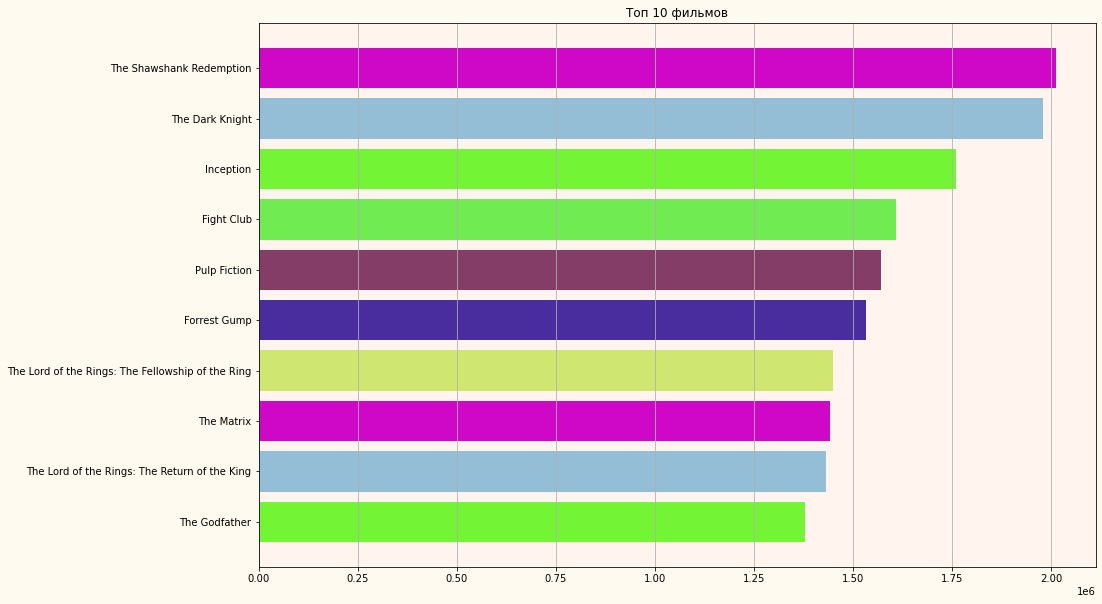

In [52]:
x = list(data[:10]['Title'])[::-1]
y = list(data[:10]['Vote'])[::-1]

fig, ax = plt.subplots()
plt.title('Топ 10 фильмов')

color_rectangle = np.random.rand(7, 3)  
ax.barh(x, y, color = color_rectangle, align = 'center')
ax.xaxis.grid(True, zorder = 1)
xs = range(len(data.columns))

fig.set_figwidth(15)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Вывод: Самый популярный фильм "Побег из Шоушенка" 2 миллиона голосов, на втором месте "The Dark Knight" c 1.98 миллиона голосов. Стоит отметить, что самые популярные фильмы также являеются лучшими фильмами в рейтинге пользователей многие годы.

## Далее посмотрим директоров фильмов, которые были наиболее популярны:

In [83]:
directors = data.groupby('Director')[['Vote']].sum()

In [86]:
top_directors = sorted(list(zip(directors['Vote'], directors.index)), reverse = True)[:10][::-1]
top_directors

[(4217093, 'Tim Burton'),
 (4447896, 'James Cameron'),
 (5208037, 'Robert Zemeckis'),
 (6171582, 'David Fincher'),
 (6262808, 'Ridley Scott'),
 (6623626, 'Peter Jackson'),
 (6774744, 'Martin Scorsese'),
 (6970578, 'Quentin Tarantino'),
 (10222671, 'Christopher Nolan'),
 (10354305, 'Steven Spielberg')]

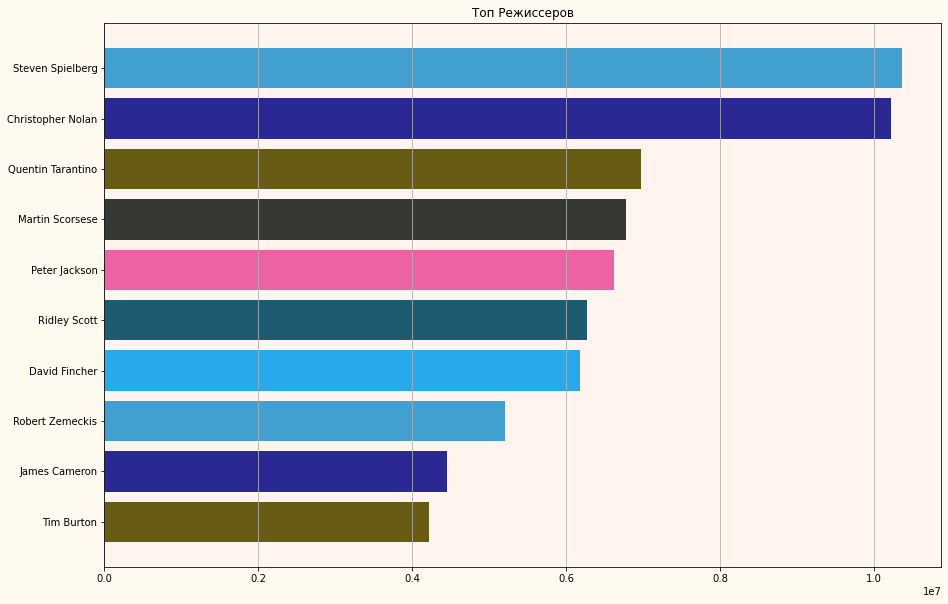

In [88]:
y = [t[0] for t in top_directors]
x = [t[1] for t in top_directors]

fig, ax = plt.subplots()
plt.title('Топ Режиссеров')

color_rectangle = np.random.rand(7, 3)  
ax.barh(x, y, color = color_rectangle, align = 'center')
ax.xaxis.grid(True, zorder = 1)
xs = range(len(data.columns))

fig.set_figwidth(15)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Вывод: Самый популярный режисер Стивен Спилберг. Его фильмы были оценены более 10 миллионов на IMDb. После с небольшим отставанием идет Кристофер Нолан. Стоит заметить, что в топ-10 самых популярных фильмов нет ни одного фильма Стивена Спилберга. Однако два фильма Кристофера Нолана (на 2-й и 3-й позициях). Режиссер самого популярного фильма "Побег из Шоушенка" (Фрэнк Дарабонт) находится только на 17-м месте.

## Посмотрим на самые длинные и короткие фильмы

In [92]:
films_time = sorted(list(zip(data['Runtime'], data['Title'])), reverse = True)[::-1]

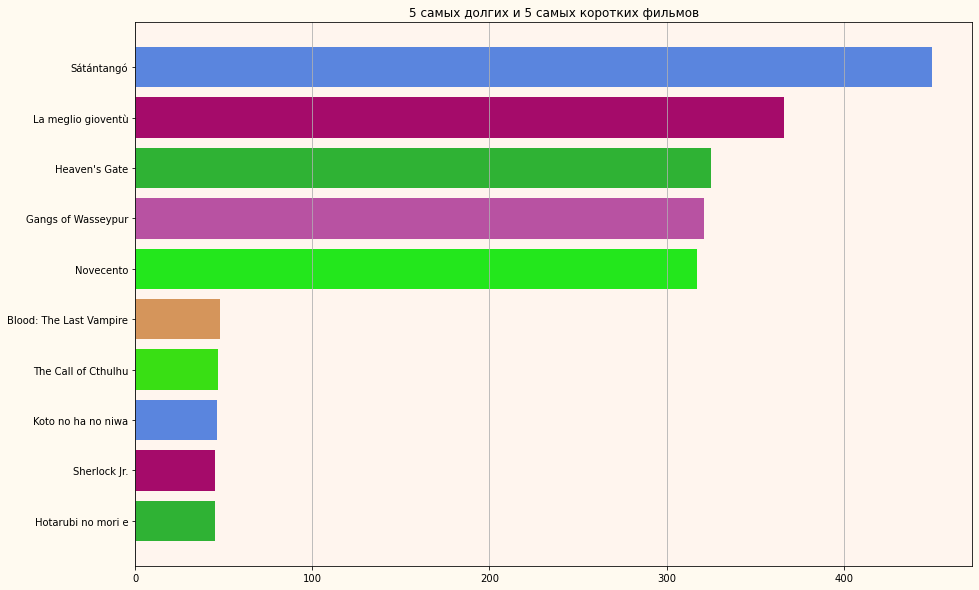

In [97]:
y = [t[0] for t in films_time[:5] + films_time[-5:]]
x = [t[1] for t in films_time[:5] + films_time[-5:]]

fig, ax = plt.subplots()
plt.title('5 самых долгих и 5 самых коротких фильмов')

color_rectangle = np.random.rand(7, 3)  
ax.barh(x, y, color = color_rectangle, align = 'center')
ax.xaxis.grid(True, zorder = 1)
xs = range(len(data.columns))

fig.set_figwidth(15)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Самый длинный фильм - это "Satantango" - Венгерский фильм 1994 года. Фильм идет 450 минут или 7 с половиной часов.
Самый короткий фильм это "Hotarubi no mori e" - японская анимация 2011 года. Эти фильмы не особо популярны (менее 10000 голосов).